In [3]:
using Pkg
Pkg.add(["StatsPlots"])
using StatsPlots

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


問1

In [42]:
p₁ = [4, 16]
p₂ = [12, 6]
p₃ = [12, 18]

2-element Vector{Int64}:
 12
 18

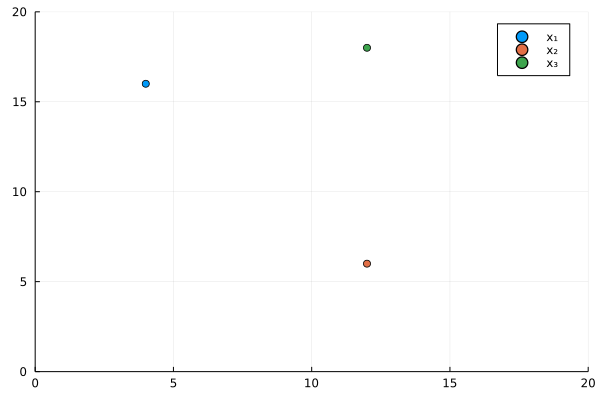

In [172]:
y = hcat(p₁, p₂, p₃)
scatter(y[1, :]', y[2, :]', xlims = (0, 20), ylims = (0, 20), label = ["x₁" "x₂" "x₃"])

 問2.1　識別関数を学習する

In [155]:
g(x, p) = - 0.5 * sum(p .^2) + p'x

g (generic function with 1 method)

In [129]:
function f(p₁, p₂)
    x₁, y₁ = p₁
    x₂, y₂ = p₂
    X = x₁ - x₂
    Y = y₁ - y₂
    C = -(sum(p₁ .^2) - sum(p₂ .^2)) / 2
    @show X Y C
    x -> -X/Y * x - C/Y
end

f (generic function with 1 method)

X = -8
Y = 10
C = -46.0


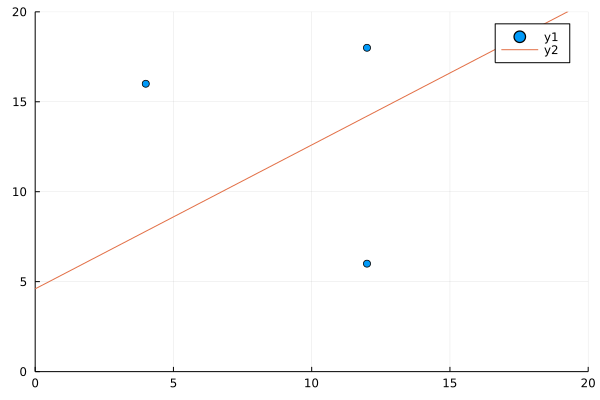

In [130]:
plot!(f(p₁, p₂))

X = -8
Y = -2
C = 98.0


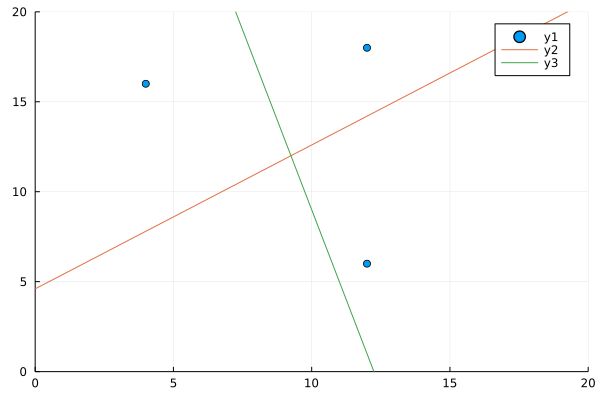

In [131]:
plot!(f(p₁, p₃))

X = 0
Y = -12
C = 144.0


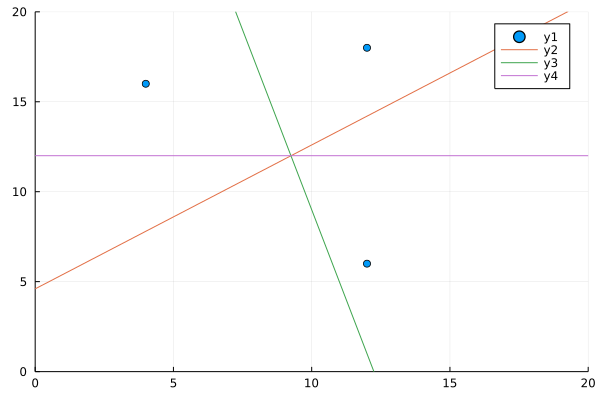

In [132]:
plot!(f(p₂, p₃))

In [147]:
p₄ = [2, 4]

2-element Vector{Int64}:
 2
 4

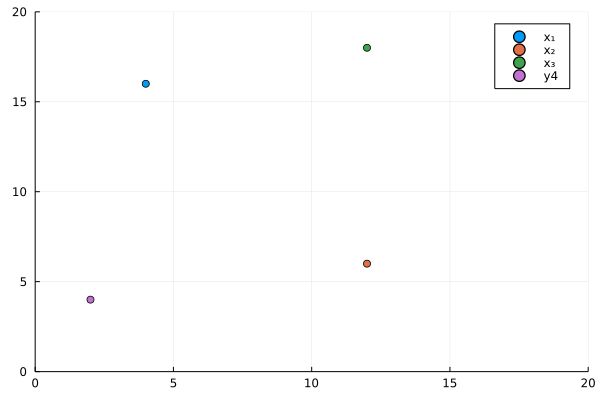

In [173]:
scatter(y[1, :]', y[2, :]', xlims = (0, 20), ylims = (0, 20), label = ["x₁" "x₂" "x₃"])
scatter!([p₄[1]], [p₄[2]])

X = -8
Y = 10
C = -46.0
X = -8
Y = -2
C = 98.0
X = 2
Y = 12
C = -126.0
X = 0
Y = -12
C = 144.0
X = 10
Y = 2
C = -80.0
X = 10
Y = 14
C = -224.0


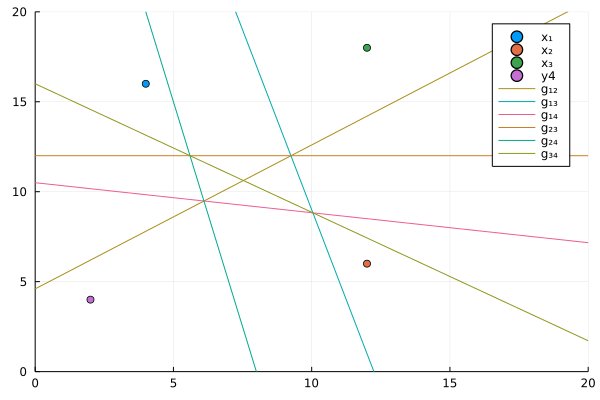

In [174]:
plot!(f(p₁, p₂), label = "g₁₂")
plot!(f(p₁, p₃), label = "g₁₃")
plot!(f(p₁, p₄), label = "g₁₄")
plot!(f(p₂, p₃), label = "g₂₃")
plot!(f(p₂, p₄), label = "g₂₄")
plot!(f(p₃, p₄), label = "g₃₄")

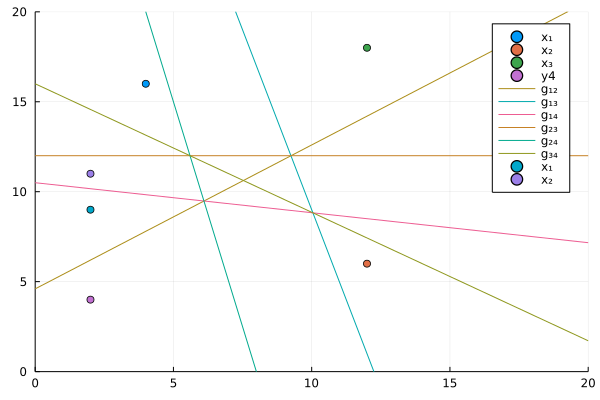

In [175]:
scatter!([2 2], [9 11], label = ["x₁" "x₂"])

In [168]:
argmax([g([2, 9], p₁), g([2, 9], p₂), g([2, 9], p₃), g([2, 9], p₄)])

4

In [169]:
argmax([g([2, 11], p₁), g([2, 11], p₂), g([2, 11], p₃), g([2, 11], p₄)])

1

問2　パーセプトロン学習規則

In [178]:
x₁ = [11, 8]
x₂ = [10, 10]
x₃ = [6, 3]
x₄ = [6, 5]
x₅ = [2, 8]
x₆ = [1, 2]

2-element Vector{Int64}:
 1
 2

In [182]:
x = hcat(x₁, x₂, x₃, x₄, x₅, x₆)'

6×2 adjoint(::Matrix{Int64}) with eltype Int64:
 11   8
 10  10
  6   3
  6   5
  2   8
  1   2

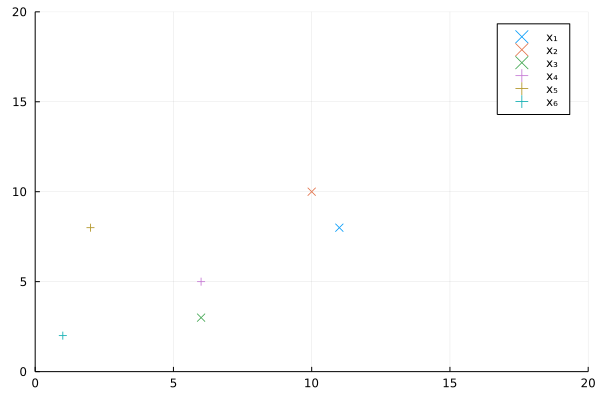

In [301]:
scatter(x[:, 1]', x[:, 2]', xlims = (0, 20), ylims = (0, 20), label = ["x₁" "x₂" "x₃" "x₄" "x₅" "x₆"], markershape = [:x :x :x :+ :+ :+])

In [302]:
ax = hcat(fill(1, 6), x)

6×3 Matrix{Int64}:
 1  11   8
 1  10  10
 1   6   3
 1   6   5
 1   2   8
 1   1   2

In [319]:
w = [-54, 13, -15] # 初期値

3-element Vector{Int64}:
 -54
  13
 -15

In [324]:
g(x, p) =  p'x # 評価する関数がこれまでと違うので再定義

g (generic function with 1 method)

In [325]:
g(ax[1, :], w)

-31

In [326]:
"""
Update the weight vector based on the perceptron learning rule.
w is weight vector and x is feature vector. Both w and x should be same length.
ρ is real value, leaning rate. ω is the indicator of the group where the feature belongs.
"""
function update!(w, x, ρ, ω)
    if (ω > 0) && (g(w, x) ≤ 0)
        @. w += ρ * x
        return false
    elseif (ω < 0) && (g(w, x) ≥ 0)
        @. w -= ρ * x
        return false
    else
        return true
    end
end

update!

In [327]:
function perceptron_learning_rule(input, n_epoch, init, ω)
    w = copy(init)
    c = Bool[]
    for e in 1:n_epoch
        println("Start epoch $e")
        for i in axes(input, 1)
            println(" * Instance $i")
            push!(c, update!(w, ax[i, :], 1, ω[i]))
            @show w
        end
        if sum(c[end-5:end]) == size(input, 1)
            return w
        end
    end
    return w
end

perceptron_learning_rule (generic function with 1 method)

In [328]:
w = perceptron_learning_rule(ax, 5, [-54, 13, -15], [1, 1, 1, -1, -1, -1])

Start epoch 1
 * Instance 1
w = [-53, 24, -7]
 * Instance 2
w = [-53, 24, -7]
 * Instance 3
w = [-53, 24, -7]
 * Instance 4
w = [-54, 18, -12]
 * Instance 5
w = [-54, 18, -12]
 * Instance 6
w = [-54, 18, -12]
Start epoch 2
 * Instance 1
w = [-54, 18, -12]
 * Instance 2
w = [-54, 18, -12]
 * Instance 3
w = [-54, 18, -12]
 * Instance 4
w = [-54, 18, -12]
 * Instance 5
w = [-54, 18, -12]
 * Instance 6
w = [-54, 18, -12]


3-element Vector{Int64}:
 -54
  18
 -12

In [329]:
function disc_line(w)
    x -> (-w[2] * x - w[1]) / w[3]
end

disc_line (generic function with 3 methods)

In [330]:
s = disc_line(w)

#69 (generic function with 1 method)

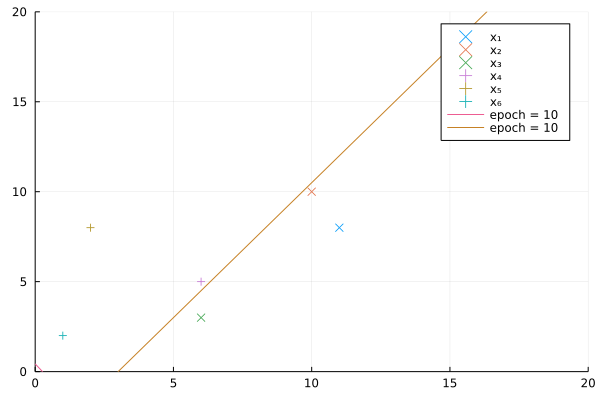

In [331]:
plot!(s, label = "epoch = 10")